In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\situ\Desktop\EDA project\diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df.sample(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
15207,1.01,Very Good,G,VS2,63.1,59.0,6108,6.40,6.37,4.03
8207,0.90,Ideal,H,VS2,62.5,53.0,4369,6.17,6.22,3.87
46667,0.72,Very Good,J,SI2,60.1,58.0,1788,5.79,5.82,3.49
49447,0.70,Ideal,I,SI1,62.5,55.0,2110,5.70,5.73,3.57


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.duplicated().sum()

146

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [10]:
y=df['price']
x=df.drop(columns='price')

In [11]:
import sklearn
from sklearn.model_selection import train_test_split 

In [12]:
x_continuous = x[['carat','depth','table','x','y','z']]
x_catagorical = x[['cut','color','clarity']]

In [13]:
x_continuous

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [14]:
x_continuous_train,x_continuous_test,x_catagorical_train,x_catagorical_test,y_train,y_test=train_test_split(x_continuous,x_catagorical,y,test_size=0.2,random_state=23)

In [15]:
x_continuous_train.shape,x_continuous_test.shape,x_catagorical_train.shape,x_catagorical_test.shape,len(y_train),len(y_test)

((43035, 6), (10759, 6), (43035, 3), (10759, 3), 43035, 10759)

In [16]:
x_continuous_train

,carat,depth,table,x,y,z
2452,0.71,61.9,55.0,5.74,5.77,3.56
10751,0.99,61.2,56.0,6.40,6.45,3.93
52713,0.63,59.2,61.0,5.60,5.55,3.30
14206,1.31,61.9,56.0,7.07,6.98,4.35
36593,0.30,60.7,58.0,4.33,4.37,2.64
...,...,...,...,...,...,...
9726,1.14,63.0,57.0,6.70,6.65,4.20
11216,0.90,62.4,59.0,6.10,6.15,3.82
26632,1.51,60.0,60.0,7.39,7.42,4.44
9277,1.08,61.2,57.4,6.57,6.63,4.04


In [17]:
beforeNormalTrain=x_continuous_train.copy()
beforeNormalTest=x_continuous_test.copy()

# MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
normalScaler=MinMaxScaler()

In [20]:
normalScaler.fit_transform(x_continuous_train)

array([[0.10602911, 0.525     , 0.31428571, 0.53445065, 0.09796265,
        0.44168734],
       [0.16424116, 0.50555556, 0.34285714, 0.59590317, 0.10950764,
        0.48759305],
       [0.08939709, 0.45      , 0.48571429, 0.52141527, 0.0942275 ,
        0.40942928],
       ...,
       [0.27234927, 0.47222222, 0.45714286, 0.68808194, 0.12597623,
        0.55086849],
       [0.18295218, 0.50555556, 0.38285714, 0.61173184, 0.11256367,
        0.50124069],
       [0.06237006, 0.51111111, 0.4       , 0.47579143, 0.08641766,
        0.38833747]])

In [21]:
x_continuous_normal_train=pd.DataFrame(normalScaler.fit_transform(x_continuous_train),
                                      columns=x_continuous_train.columns,
                                      index=x_continuous_train.index)

In [22]:
x_continuous_normal_train

,carat,depth,table,x,y,z
2452,0.106029,0.525000,0.314286,0.534451,0.097963,0.441687
10751,0.164241,0.505556,0.342857,0.595903,0.109508,0.487593
52713,0.089397,0.450000,0.485714,0.521415,0.094228,0.409429
14206,0.230769,0.525000,0.342857,0.658287,0.118506,0.539702
36593,0.020790,0.491667,0.400000,0.403166,0.074194,0.327543
...,...,...,...,...,...,...
9726,0.195426,0.555556,0.371429,0.623836,0.112903,0.521092
11216,0.145530,0.538889,0.428571,0.567970,0.104414,0.473945
26632,0.272349,0.472222,0.457143,0.688082,0.125976,0.550868
9277,0.182952,0.505556,0.382857,0.611732,0.112564,0.501241


In [23]:
x_continuous_normal_Test = pd.DataFrame(normalScaler.fit_transform(x_continuous_test),
                                columns = x_continuous_test.columns,
                                index = x_continuous_test.index)

In [24]:
x_continuous_normal_Test

,carat,depth,table,x,y,z
24251,0.333333,0.670139,0.269231,0.722880,0.722772,0.143396
21948,0.330789,0.663194,0.288462,0.715976,0.722772,0.142138
3703,0.203562,0.690972,0.250000,0.623274,0.623762,0.124843
2020,0.147583,0.614583,0.250000,0.588757,0.597030,0.114465
40252,0.081425,0.656250,0.230769,0.509862,0.517822,0.101258
...,...,...,...,...,...,...
49417,0.083969,0.638889,0.269231,0.513807,0.512871,0.100314
10490,0.216285,0.607639,0.288462,0.645957,0.653465,0.125157
41897,0.061069,0.642361,0.269231,0.479290,0.485149,0.094340
32156,0.020356,0.618056,0.230769,0.420118,0.424752,0.081761


<Axes: ylabel='Count'>

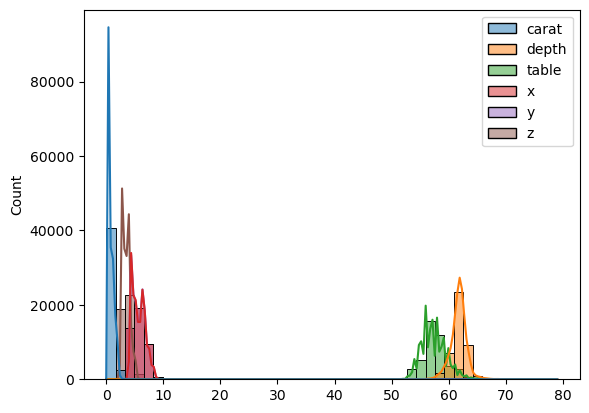

In [25]:
sns.histplot(beforeNormalTrain,kde = True)

<Axes: ylabel='Count'>

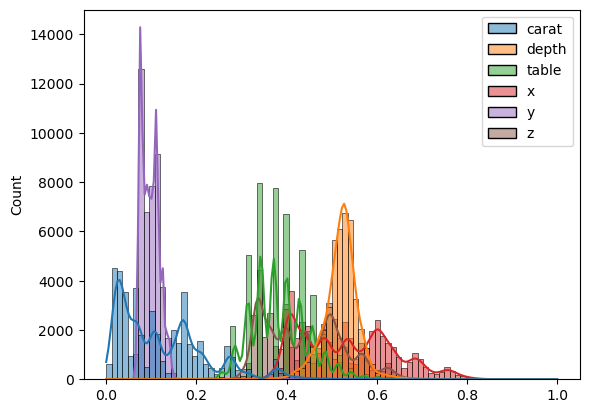

In [26]:
sns.histplot(x_continuous_normal_train,kde = True)

# Conclusion

- from above observation that there is no change in the distribution Only scaling changed.